In [107]:
import json
import os
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

#imageDataDir = 'C:\\Users\\tequi\\Documents\\repos\\sudokuSolver_py\\allImgsLabelledDB\\'
imageDataDir = 'C:\\Users\\JOSA\\Documents\\repos\\sudokuSolver_py\\allImgsLabelledDB\\'
    
filename = os.path.join(imageDataDir, 'image1.jpg')
imgOr = io.imread(filename)

with open('textLabels.txt') as json_file:
    data = json.load(json_file)

In [108]:
ints = []
for i in data['label']:
    try:
        newInt = int(float(i))
        ints.append(newInt)
    except ValueError:
        ints.append(int(0))
        
data['label'] = ints

#remove 0s
removeIdx = []
for i in range(0, len(data['label'])):
    if data['label'][i] == 0:
        removeIdx.append(i)
for index in sorted(removeIdx, reverse=True):
    del data['label'][index]
    del data['x'][index]
    del data['y'][index]
    

[0, 8, 1, 6, 2, 6, 2, 5, 4, 7, 6, 3, 37, 6, 5, 4, 0, 74, 35, 0, 10]
[8, 1, 6, 2, 6, 2, 5, 4, 7, 6, 3, 37, 6, 5, 4, 74, 35, 10]


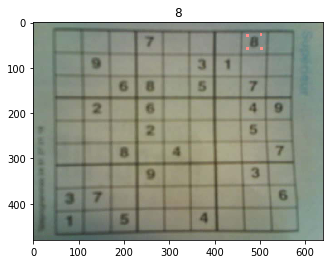

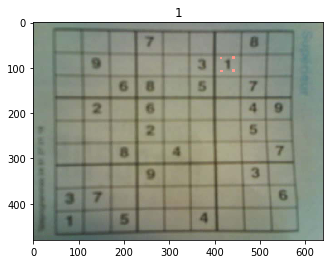

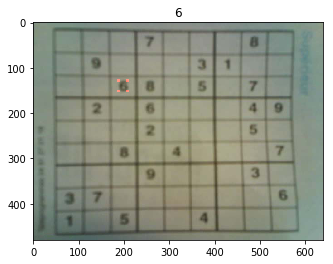

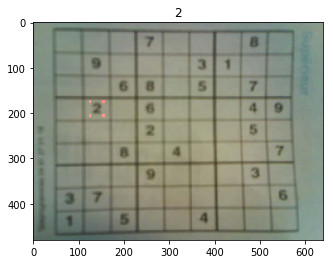

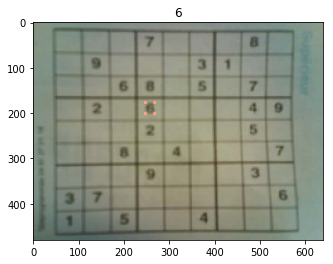

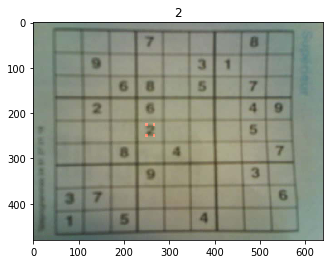

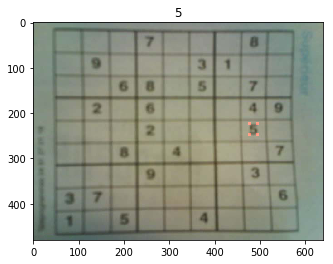

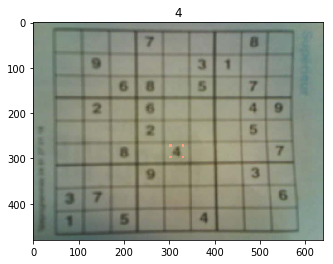

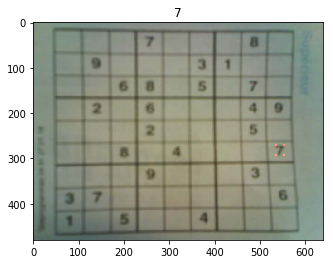

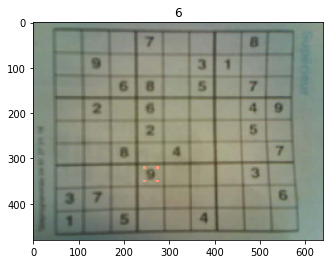

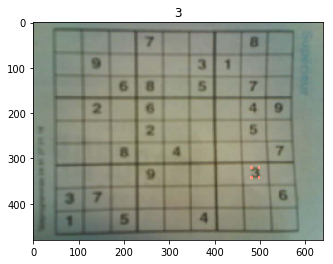

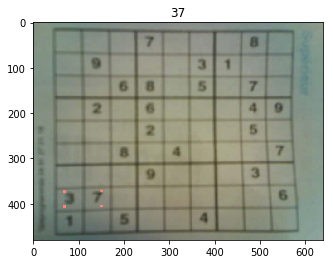

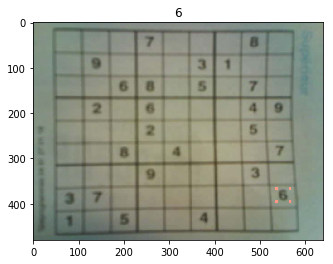

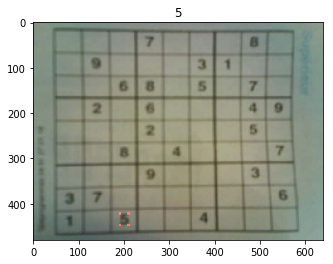

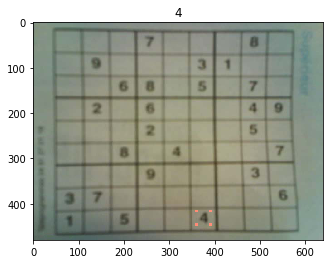

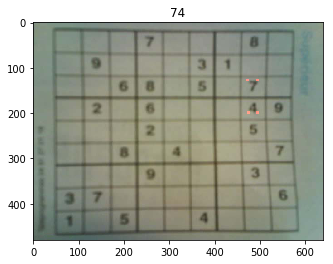

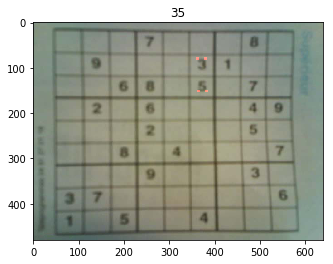

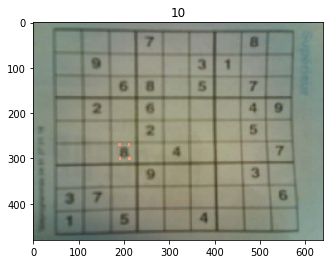

In [109]:
for ii in range(0, len(data['label'])):
    img = imgOr.copy()
    for i in range(0,4):
        img[data['y'][ii][i]-3:data['y'][ii][i]+3,
            data['x'][ii][i]-3:data['x'][ii][i]+3,
            0] = 255
    plt.imshow(img)
    plt.title(data['label'][ii])
    plt.show()
    

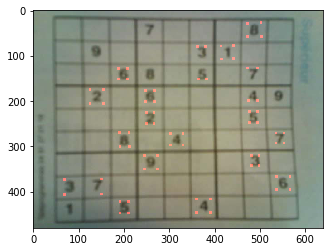

In [110]:
img = imgOr.copy()
for ii in range(0, len(data['label'])):
    for i in range(0,4):
        img[data['y'][ii][i]-3:data['y'][ii][i]+3,
            data['x'][ii][i]-3:data['x'][ii][i]+3,
            0] = 255
plt.imshow(img)
plt.show()  


In [140]:
#correct labels that are in fact 2 numbers
newLabels = []
removeIdx = []
newX = []
newY = []
for i in range(0, len(data['label'])):
    if data['label'][i]>9:
        removeIdx.append(i)        
        xs = data['x'][i]
        ys = data['y'][i]
        hl = np.amax(np.abs(np.diff(np.asarray(xs))))
        vl = np.amax(np.abs(np.diff(np.asarray(ys))))
        print(xs, ys, hl, vl)
        if hl > vl*1.5:
            xs1 = [xs[0], int(xs[0]+(xs[1]-xs[0])/2),
                  int(xs[0]+(xs[1]-xs[0])/2), xs[3]]
            xs2 = [int(xs[0]+(xs[1]-xs[0])/2), xs[1],
                  xs[1], int(xs[0]+(xs[1]-xs[0])/2)]
            ys1 = ys
            ys2 = ys
            newX.append(xs1)
            newX.append(xs2)
            newY.append(ys1)
            newY.append(ys2)
            newLabels.append(list(map(int, list(str(data['label'][i])))))
        elif vl > hl*1.5:
            ys1 = [ys[0], ys[1],
                   int(ys[1]+(ys[2]-ys[1])/2),
                   int(ys[1]+(ys[2]-ys[1])/2)]
            ys2 = [int(ys[1]+(ys[2]-ys[1])/2),
                   int(ys[1]+(ys[2]-ys[1])/2),
                  ys[2], ys[3]]            
            xs1 = xs
            xs2 = xs
            newX.append(xs1)
            newX.append(xs2)
            newY.append(ys1)
            newY.append(ys2)
            newLabels.append(list(map(int, list(str(data['label'][i])))))


# print(newLabels)
# print(newX)
# print(newY)
        

[70, 151, 151, 70] [373, 372, 405, 406] 81 33
[495, 496, 475, 474] [128, 199, 199, 128] 21 71
[381, 383, 365, 363] [80, 152, 152, 80] 18 72
[212, 213, 192, 191] [270, 300, 300, 270] 21 30


It is actually easier to pass api vision directly the squares. To save on the number of images to analyze, we coud first pass them to our ML algorithm, modified to classify simply 'empty' vs 'non empty' cells, and then give to the api visin only the non-empty cells.